In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE
# tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
#
# SVM
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
#
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
import pandas as pd
from google.colab import files



# Read in two data sets
df1=pd.read_csv("student-mat.csv")
df2=pd.read_csv("student-por.csv")

# Merge the two dataframes
frames = [df1, df2]
df3 = pd.concat(frames)
print(df3.isna().any())
# No empty value exist

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool


In [ ]:
import sys
!{sys.executable} -m pip install imbalanced-learn delayed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 2.6 MB/s 
     |████████████████████████████████| 244 kB 32.3 MB/s 


In [ ]:
# Data Encoding
#df3 = df3.drop(columns=['G1', 'G2', 'G3'])
mapping = {'school': {'GP':0, 'MS':1},
           'sex': {'F':0, 'M':1},
          'address': {'U':0, 'R':1},
           'famsize': {'LE3':0, 'GT3':1},
           'Pstatus': {'T':0, 'A':1},
           'schoolsup':{'no':0,'yes':1},
           'famsup':{'no':0,'yes':1},
           'paid':{'no':0,'yes':1},
           'activities':{'no':0,'yes':1},
           'nursery': {'no':0, 'yes':1},
           'internet':{'no':0,'yes':1},
           'higher':{'no':0, 'yes':1},
           'romantic':{'no':0,'yes':1}}

for col in list(mapping.keys()):
    df3[col] = df3[col].map(mapping[col])

# display(df3)


df3.Mjob.replace(['teacher', 'health', 'services', 'at_home', 'other'], [0, 1, 2, 3, 4], inplace= True)
df3.Fjob.replace(['teacher', 'health', 'services', 'at_home', 'other'], [0, 1, 2, 3, 4], inplace= True)
df3.reason.replace(['course', 'home', 'reputation', 'other'], [0, 1, 2, 3], inplace= True)
df3.guardian.replace(['mother', 'father', 'other'], [0, 1, 2], inplace= True)
df3.age.replace([15, 16, 17, 18, 19, 20, 21, 22], [0, 1, 2, 3, 4, 5, 6, 7], inplace= True)


display(df3)
print(df3['Dalc'].value_counts())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,3,0,1,1,4,4,3,0,...,4,3,4,1,1,3,6,5,6,6
1,0,0,2,0,1,0,1,1,3,4,...,5,3,3,1,1,3,4,5,5,6
2,0,0,0,0,0,0,1,1,3,4,...,4,3,2,2,3,3,10,7,8,10
3,0,0,0,0,1,0,4,2,1,2,...,3,2,2,1,1,5,2,15,14,15
4,0,0,1,0,1,0,3,3,4,4,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,4,1,1,0,2,3,2,4,...,5,4,2,1,2,5,4,10,11,10
645,1,0,3,0,0,0,3,1,0,2,...,4,3,4,1,1,1,4,15,15,16
646,1,0,3,0,1,0,1,1,4,4,...,1,1,1,1,1,5,6,11,12,9
647,1,1,2,0,0,0,3,1,2,2,...,2,4,5,3,4,2,6,10,10,10


1    727
2    196
3     69
5     26
4     26
Name: Dalc, dtype: int64


# **Dataset Analysis**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

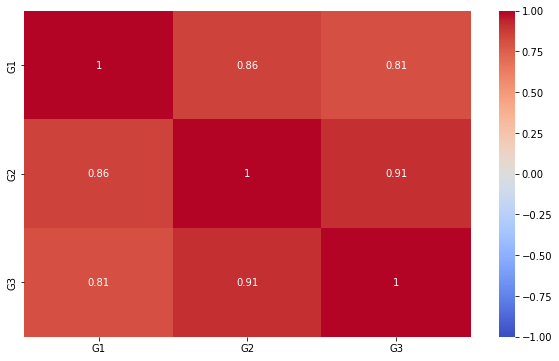

In [ ]:
# Grade correlation
df_cor = df3[['G1', 'G2', 'G3']]
plt.figure(figsize=(10, 6))
grade_cor = sns.heatmap(df_cor.corr(), annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap= 'coolwarm').get_figure()

grade_cor.savefig('gradeCor.png')
files.download('gradeCor.png')

# **Feature Selection**

     school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0         0    0    3        0        1        1     4     4     3     0  ...   
1         0    0    2        0        1        0     1     1     3     4  ...   
2         0    0    0        0        0        0     1     1     3     4  ...   
3         0    0    0        0        1        0     4     2     1     2  ...   
4         0    0    1        0        1        0     3     3     4     4  ...   
..      ...  ...  ...      ...      ...      ...   ...   ...   ...   ...  ...   
644       1    0    4        1        1        0     2     3     2     4  ...   
645       1    0    3        0        0        0     3     1     0     2  ...   
646       1    0    3        0        1        0     1     1     4     4  ...   
647       1    1    2        0        0        0     3     1     2     2  ...   
648       1    1    3        1        0        0     3     2     2     4  ...   

     higher  internet  roma

Text(0.5, 0, 'Relative Importance')

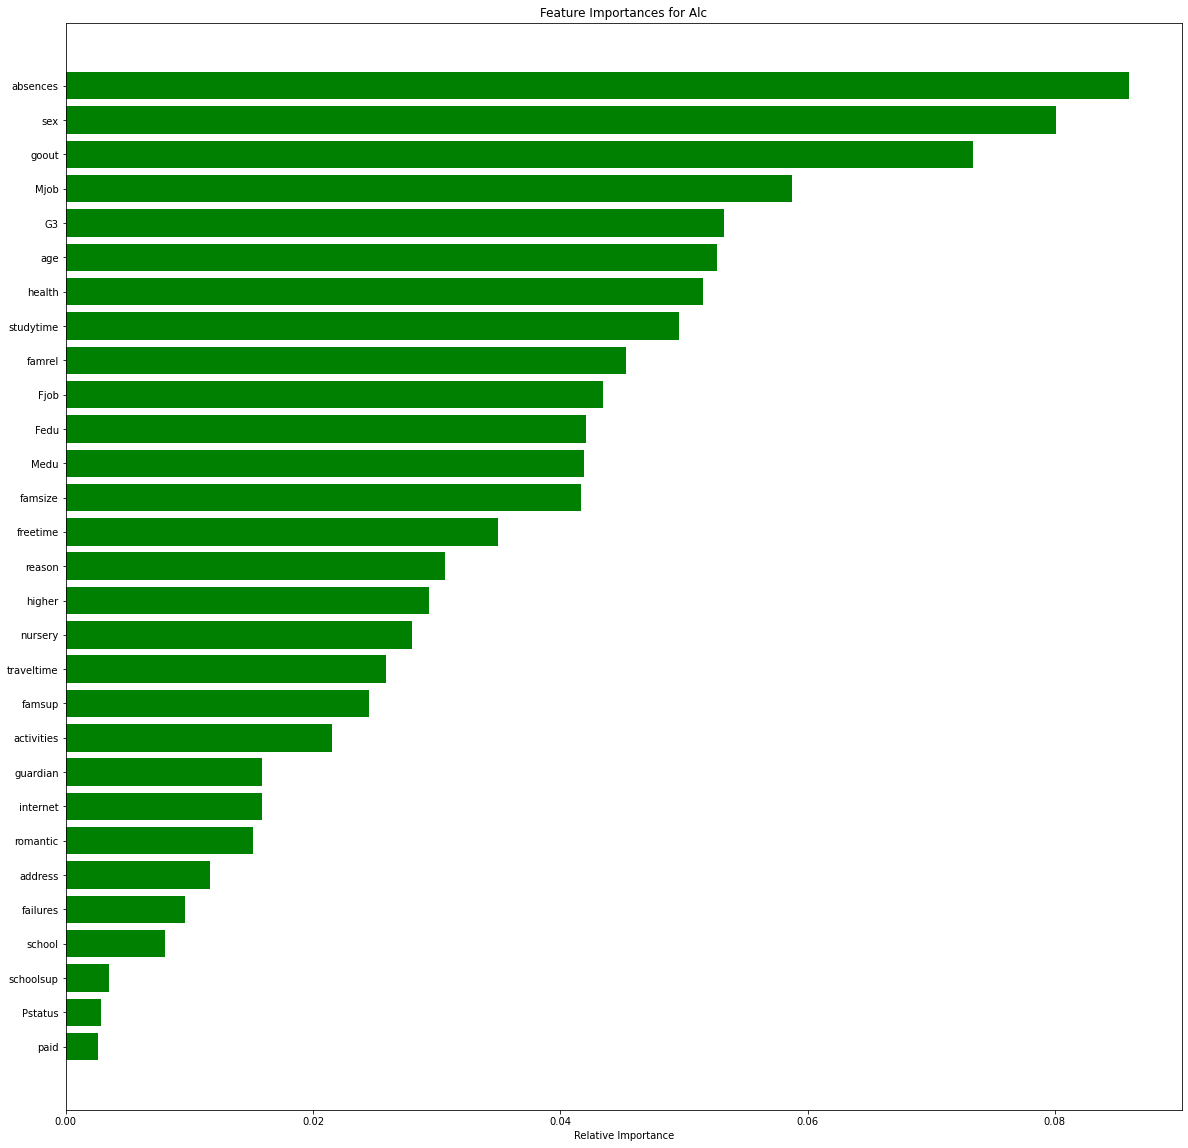

In [ ]:
# Try combining Dalc and Walc
df3['Alc'] = df3['Dalc'] + df3['Walc']

df_combine = df3.drop(columns=['Dalc', 'Walc', 'G1', 'G2'], axis=1)

print(df_combine)

# Oversampling using SMOTE
X_alc_ovs, y_alc_ovs = SMOTE().fit_resample(df_combine.drop(['Alc'], axis=1), df_combine['Alc'])

# Split the data 80:20 and train
X_train, X_test, y_train, y_test = train_test_split(X_alc_ovs, y_alc_ovs, test_size=0.2)
Alc_Ranforest = RandomForestClassifier(criterion='entropy', n_estimators=200, max_depth=9)
Alc_Ranforest.fit(X_train, y_train)

#print out the accuracy
scores = cross_val_score(Alc_Ranforest, X_alc_ovs, y_alc_ovs, cv=5)
print("The Accuracy is: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Alc_Ranforest.feature_importances_

features_table = pd.DataFrame(np.hstack((np.array(list(X_alc_ovs.columns)).reshape(29,1), Alc_Ranforest.feature_importances_.reshape(29,1))))

features_names = features_table[0]
importances = Alc_Ranforest.feature_importances_
ind = np.argsort(importances)
print(ind)

# Plot
plt.figure(figsize=(20,20))
plt.title('Feature Importances for Alc')
plt.barh(range(len(ind)), importances[ind], color='g', align='center')
plt.yticks(range(len(ind)), [features_names[i] for i in ind])
plt.xlabel('Relative Importance')

In [ ]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestClassifier(criterion='entropy', n_estimators=500, max_depth=10))
sel.fit(X_alc_ovs, y_alc_ovs)
selected_feat= X_alc_ovs.columns[(sel.get_support())]
print(selected_feat)

Index(['sex', 'age', 'famsize', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'studytime',
       'famrel', 'freetime', 'goout', 'health', 'absences', 'G3'],
      dtype='object')


# **Model**

In [ ]:
X_alc_ovs_select = X_alc_ovs[['sex', 'age', 'famsize', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'studytime',
       'famrel', 'freetime', 'goout', 'health', 'absences', 'G3']]

# One hot encoding
fjob = pd.get_dummies(X_alc_ovs_select['Fjob'], prefix = 'fjob')
mjob = pd.get_dummies(X_alc_ovs_select['Mjob'], prefix = 'mjob')
X_alc_ovs_select = pd.concat([X_alc_ovs_select, fjob, mjob], axis = 1)
X_alc_ovs_select = X_alc_ovs_select.drop(columns=['Fjob', 'Mjob'])

# Trainning
X_train, X_test, y_train, y_test = train_test_split(X_alc_ovs, y_alc_ovs, test_size=0.2)
Alc_Ranforest = RandomForestClassifier(criterion='entropy', n_estimators=500, max_depth=10)
Alc_Ranforest.fit(X_train, y_train)
Alc_predict = Alc_Ranforest.predict(X_test)
print(Alc_predict)
print(confusion_matrix(y_test, Alc_predict))
print(classification_report(y_test, Alc_predict))

[ 6  6  6  7  2  4 10  8  7  9  5  4  6  6 10  3  4  8  4  5 10  4  5  4
  7  6  7  6  2  8  6  4  7  6  7  9 10  3  8  7  7  4  6  7  8  7 10  8
 10  7  8  7  6  9 10  7  5  5  7  2  3  2  4 10  5 10  2  4  9  7  6  3
  7 10  9  2  9  7  6 10  5  3  2  7 10  9  4  3  3  2  8  2 10  5  4  4
 10  7 10 10  5  7  2  8  2  9 10  3  3 10  6 10  8  7  8  4  9  7  7  4
  5  7  7  9  4  6  4 10  5  5  3  8  2  5  8  7  9  7  7  6  4 10  6  8
  8  9  4  8  7  7  4  5  6  8  9  3  9 10  2  5  9  3  3  6 10  5  7  4
  7  3  8  7  3  8  9 10  3 10  3  6  2  6  8  9  5  3  8  3  9  6  6  4
 10  7  8  7  4  6 10  8  9 10  9  7  8  3  5  8  5  5  5  5  6 10  5  7
  8  5  2 10 10 10 10  2  2  6  3  9  6  7  7  6  2  8  6  6  4  2  6  3
  9  9  6  7  4  7  6 10  4  9  4 10 10  9  9 10  9  5  9 10  7  4  4  6
 10  4  6  4  6  9  4  8  3 10  8  3  8  7  4  7 10  5  6  9 10 10  6  8
  9  3  3  7  8  3  5  6 10  2  7  5  9  5  4  7  4  3  3  4  9  8  5 10
  5  8  6  7  7 10  8  9  5  8  3  4  6  2  2  5  7

In [ ]:
#from sklearn.model_selection import GridSearchCV
#param_grid = { 
    #'n_estimators': [200, 500],
    #'max_features': ['auto', 'sqrt', 'log2'],
    #'max_depth' : [3,4,5,6,7,8,9,10],
    #'criterion' :['gini', 'entropy']
#}
#rfc=RandomForestClassifier()
#CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
#CV_rfc.fit(X_train, y_train)
#CV_rfc.best_params_

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_alc_ovs_select, y_alc_ovs, test_size=0.2)
Alc_Ranforest = RandomForestClassifier(criterion='entropy', n_estimators=200, max_depth=10, max_features= 'log2')
Alc_Ranforest.fit(X_train, y_train)
Alc_predict = Alc_Ranforest.predict(X_test)
print(confusion_matrix(y_test, Alc_predict))
print(classification_report(y_test, Alc_predict))

[[55  7 10  4  2  2  1  2  0]
 [ 8 62  5  1  1  1  1  0  0]
 [ 1  8 49  4  1  1  1  1  2]
 [ 1  4  5 64  1  2  0  1  4]
 [ 2  3  0  1 61  2  2  0  0]
 [ 0  2  0  3  0 74  0  0  0]
 [ 0  1  0  1  0  0 88  0  0]
 [ 0  0  0  0  0  0  0 71  0]
 [ 0  0  0  0  0  0  1  0 80]]
              precision    recall  f1-score   support

           2       0.82      0.66      0.73        83
           3       0.71      0.78      0.75        79
           4       0.71      0.72      0.72        68
           5       0.82      0.78      0.80        82
           6       0.92      0.86      0.89        71
           7       0.90      0.94      0.92        79
           8       0.94      0.98      0.96        90
           9       0.95      1.00      0.97        71
          10       0.93      0.99      0.96        81

    accuracy                           0.86       704
   macro avg       0.86      0.86      0.85       704
weighted avg       0.86      0.86      0.86       704



In [ ]:
# StandardScaler
# scaling
scaler = StandardScaler()
num_cols = ['absences', 'G3']
scaler.fit(X_alc_ovs_select[num_cols])
X_log = X_alc_ovs_select
X_log[num_cols] = scaler.transform(X_alc_ovs_select[num_cols])

# Split
X_train, X_test, y_train, y_test = train_test_split(X_log, y_alc_ovs, test_size=0.2)

# Logistic Regression
alc_log = LogisticRegression()
alc_log.fit(X_train, y_train)
y_pred = alc_log.predict(X_test)
print(y_pred)

# classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[ 5  8  8  8  3  5  8  5  3 10  7  4  2  3  5  7  6  8  2  2  8  3  2  6
  5 10  5  2  9  3  3  4  6  6  7  5  9  8 10  7  2  8  5  2  7  2  4  2
  3  9  2 10 10 10 10  5 10  7  3  3  9  8 10  6  9  3 10  6  2  5  5 10
  9 10  2  3  6  8  2  5  8  5  3  4 10  9  9  7  2  3  4  9  6  5  4  4
  2  6  2  6  9  7  3  7 10  7  9  6  7  7  3  7  2  5  3  9  9  5  7  6
  7  5  8  5  5  5  3  8  9  4  7 10  5  9  5 10  3  5  3  5  4  9  9  8
 10  7  7  4  5  6  5  8  9 10  4  3  7  3  7  5  3 10  8  8  3  9 10  4
 10  7  6  2  2  8 10  9  2  7 10  9  6  4  5  2 10 10 10  4  8  2  9  8
  4  6  5  4  8  6  7  3  7  8  4  5  5  9  6  9  5  9  6  5 10  8  2  9
 10  8  3  9  8  9  2  4  8  5  5  7  8  8  8  5  9  2  3  4  7  2  2  9
  5  7  7  8  9  9  9  9  2 10  6  2  3  7  9  8  5  3  7  6  2  3  5 10
  2  2  2 10 10 10  7  8  5  3  9  2  7  2  7 10  2  9  8  8  2  2  6  9
  5  6  5  7  8  7  9  7 10  8  7  4  5  9  2  9  2  8  9  7  2  3  9  2
  8  2 10 10  5 10  8  5 10  9  9  9  8  4 10  7  3

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
#from sklearn.svm import SVC
#X_train, X_test, y_train, y_test = train_test_split(X_alc_ovs, y_alc_ovs, test_size=0.2)
#param_grid = {'C': [0.1, 1, 10],
              #'gamma': [1, 0.1, 0.01],
              #'kernel': ['linear', 'poly', 'rbf']}
 
#CV_SVM = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv= 5)
#CV_SVM.fit(X_train, y_train)
#print(CV_SVM.best_estimator_)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_alc_ovs, y_alc_ovs, test_size=0.2)

Alc_SVM = SVC(C=10, gamma=0.1)
Alc_SVM.fit(X_train, y_train)
Alc_predict = Alc_SVM.predict(X_test)
print(confusion_matrix(y_test, Alc_predict))
print(classification_report(y_test, Alc_predict))

[[56  8  3  2  1  1  0  0  0]
 [13 70  1  1  0  0  0  0  0]
 [ 7  1 63  0  0  0  0  0  0]
 [ 4  2  0 75  0  0  0  0  0]
 [ 4  0  1  0 78  0  0  0  0]
 [ 1  0  1  0  0 65  0  0  0]
 [ 0  0  1  0  0  0 81  0  0]
 [ 0  0  0  0  0  0  0 87  0]
 [ 1  0  0  0  0  0  0  0 76]]
              precision    recall  f1-score   support

           2       0.65      0.79      0.71        71
           3       0.86      0.82      0.84        85
           4       0.90      0.89      0.89        71
           5       0.96      0.93      0.94        81
           6       0.99      0.94      0.96        83
           7       0.98      0.97      0.98        67
           8       1.00      0.99      0.99        82
           9       1.00      1.00      1.00        87
          10       1.00      0.99      0.99        77

    accuracy                           0.92       704
   macro avg       0.93      0.92      0.92       704
weighted avg       0.93      0.92      0.93       704



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_alc_ovs_select, y_alc_ovs, test_size=0.2)

Alc_SVM = SVC(C=10, gamma=0.1)
Alc_SVM.fit(X_train, y_train)
Alc_predict = Alc_SVM.predict(X_test)
print(confusion_matrix(y_test, Alc_predict))
print(classification_report(y_test, Alc_predict))

[[56  6 11  1  1  2  0  0  0]
 [11 66  5  1  2  0  0  0  0]
 [ 3  3 63  0  3  1  0  0  1]
 [ 1  1  4 66  2  2  0  0  0]
 [ 0  3  0  2 77  0  3  0  1]
 [ 1  0  0  1  0 93  0  0  0]
 [ 0  0  2  0  1  2 66  0  0]
 [ 1  0  0  0  0  0  0 69  0]
 [ 0  0  0  0  0  0  0  0 70]]
              precision    recall  f1-score   support

           2       0.77      0.73      0.75        77
           3       0.84      0.78      0.80        85
           4       0.74      0.85      0.79        74
           5       0.93      0.87      0.90        76
           6       0.90      0.90      0.90        86
           7       0.93      0.98      0.95        95
           8       0.96      0.93      0.94        71
           9       1.00      0.99      0.99        70
          10       0.97      1.00      0.99        70

    accuracy                           0.89       704
   macro avg       0.89      0.89      0.89       704
weighted avg       0.89      0.89      0.89       704



In [ ]:
import sys
!{sys.executable} -m pip install shap delayed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 564 kB 4.1 MB/s 


In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 564 kB 5.3 MB/s 


[[ 9 35 11  7  1  0  1  0  0]
 [ 1 35 26  5  4  1  0  0  0]
 [ 0  6 55 10  2  0  0  1  0]
 [ 0  4 17 50  8  0  0  0  0]
 [ 0  0  2 19 56  6  0  0  0]
 [ 0  1  2  6 21 52  0  0  0]
 [ 0  0  0  1  3  9 64  1  0]
 [ 0  0  0  1  0  3  3 82  0]
 [ 0  0  0  0  0  2  6 11 64]]
              precision    recall  f1-score   support

           2       0.90      0.14      0.24        64
           3       0.43      0.49      0.46        72
           4       0.49      0.74      0.59        74
           5       0.51      0.63      0.56        79
           6       0.59      0.67      0.63        83
           7       0.71      0.63      0.67        82
           8       0.86      0.82      0.84        78
           9       0.86      0.92      0.89        89
          10       1.00      0.77      0.87        83

    accuracy                           0.66       704
   macro avg       0.71      0.65      0.64       704
weighted avg       0.71      0.66      0.65       704



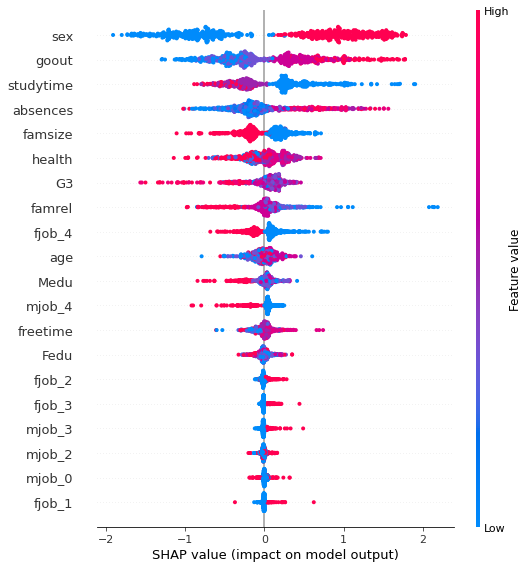

In [ ]:
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X_alc_ovs_select, y_alc_ovs, test_size=0.2)
Alc_Ranforest = RandomForestRegressor(n_estimators = 500, max_depth=100, max_features= 'auto')
Alc_Ranforest.fit(X_train, y_train)
Alc_predict = Alc_Ranforest.predict(X_test)
print(confusion_matrix(y_test, np.rint(Alc_predict)))
print(classification_report(y_test, np.rint(Alc_predict)))

import shap
shap_values = shap.TreeExplainer(Alc_Ranforest).shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [ ]:
import seaborn as sns
df4 = df_combine[['sex', 'age', 'famsize', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'studytime',
       'famrel', 'freetime', 'goout', 'health', 'absences', 'G3', 'Alc']]
#sns.pairplot(df4, hue = 'Alc')


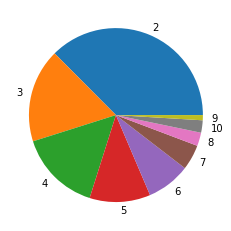

In [ ]:
import matplotlib.pyplot as plt
y1 = np.array(df3['Alc'].value_counts())
labels = ["2", "3", "4", "5", "6", "7", "8", "10","9"]
plt.pie(y1, labels = labels)
plt.show() 

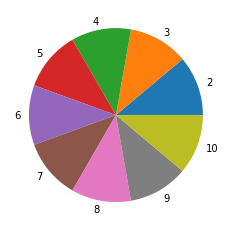

In [ ]:
import matplotlib.pyplot as plt
y1 = np.array(y_alc_ovs.value_counts())
labels = ["2", "3", "4", "5", "6", "7", "8", "9","10"]
plt.pie(y1, labels = labels)
plt.show() 


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_alc_ovs, y_alc_ovs, test_size=0.2)
from sklearn.neighbors import KNeighborsClassifier
Alc_KNN = KNeighborsClassifier(n_neighbors = 2)
Alc_KNN.fit(X_train, y_train)
Alc_predict = Alc_KNN.predict(X_test)
print(confusion_matrix(y_test, Alc_predict))
print(classification_report(y_test, Alc_predict))

[[46 16  6  3  7  1  0  0  0]
 [ 7 55  2  2  1  1  0  2  0]
 [ 8  6 66  1  0  1  0  1  0]
 [ 2  3  1 62  0  0  0  0  0]
 [ 0  0  0  0 65  0  0  0  0]
 [ 0  0  0  0  0 84  0  1  0]
 [ 0  0  0  0  0  2 85  0  0]
 [ 0  0  0  0  0  0  0 82  0]
 [ 0  0  1  0  0  0  0  0 84]]
              precision    recall  f1-score   support

           2       0.73      0.58      0.65        79
           3       0.69      0.79      0.73        70
           4       0.87      0.80      0.83        83
           5       0.91      0.91      0.91        68
           6       0.89      1.00      0.94        65
           7       0.94      0.99      0.97        85
           8       1.00      0.98      0.99        87
           9       0.95      1.00      0.98        82
          10       1.00      0.99      0.99        85

    accuracy                           0.89       704
   macro avg       0.89      0.89      0.89       704
weighted avg       0.89      0.89      0.89       704



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_alc_ovs_select, y_alc_ovs, test_size=0.2)
from sklearn.neighbors import KNeighborsClassifier
Alc_KNN = KNeighborsClassifier(n_neighbors=2)
Alc_KNN.fit(X_train, y_train)
Alc_predict = Alc_KNN.predict(X_test)
print(confusion_matrix(y_test, Alc_predict))
print(classification_report(y_test, Alc_predict))

[[51  7  3  5  4  0  0  0  2]
 [ 9 67  1  1  0  1  0  0  0]
 [ 5  3 77  1  1  0  0  0  1]
 [ 3  4  7 57  1  1  0  1  0]
 [ 0  0  1  2 68  0  1  0  0]
 [ 2  1  5  0  1 71  0  1  0]
 [ 0  0  0  0  0  1 78  0  0]
 [ 0  0  0  0  0  0  0 84  0]
 [ 0  0  0  1  2  0  1  0 71]]
              precision    recall  f1-score   support

           2       0.73      0.71      0.72        72
           3       0.82      0.85      0.83        79
           4       0.82      0.88      0.85        88
           5       0.85      0.77      0.81        74
           6       0.88      0.94      0.91        72
           7       0.96      0.88      0.92        81
           8       0.97      0.99      0.98        79
           9       0.98      1.00      0.99        84
          10       0.96      0.95      0.95        75

    accuracy                           0.89       704
   macro avg       0.89      0.88      0.88       704
weighted avg       0.89      0.89      0.89       704



In [ ]:
y_alc_ovs_dummies = pd.get_dummies(y_alc_ovs)
X_train, X_test, y_train, y_test = train_test_split(X_alc_ovs_select, y_alc_ovs, test_size=0.2)
from sklearn.neural_network import MLPClassifier
Alc_MLP = MLPClassifier(hidden_layer_sizes=(20, 40, 25, 10),
                       solver='adam', alpha=0.0001,learning_rate='constant', 
                      learning_rate_init=0.005)
Alc_MLP.fit(X_train, y_train)
Alc_predict = Alc_MLP.predict(X_test)
print(classification_report(y_test, Alc_predict))

              precision    recall  f1-score   support

           2       0.50      0.53      0.52        92
           3       0.38      0.29      0.33        86
           4       0.51      0.52      0.52        71
           5       0.65      0.65      0.65        78
           6       0.76      0.80      0.78        82
           7       0.73      0.84      0.78        55
           8       0.94      0.93      0.93        85
           9       0.96      0.96      0.96        82
          10       0.95      0.95      0.95        73

    accuracy                           0.71       704
   macro avg       0.71      0.72      0.71       704
weighted avg       0.70      0.71      0.71       704



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_alc_ovs, y_alc_ovs, test_size=0.2)
from sklearn.neural_network import MLPClassifier
Alc_MLP = MLPClassifier(hidden_layer_sizes=(20, 40, 25, 10),
                       solver='adam', alpha=0.0001,learning_rate='constant', 
                      learning_rate_init=0.005)
Alc_MLP.fit(X_train, y_train)
Alc_predict = Alc_MLP.predict(X_test)
print(classification_report(y_test, Alc_predict))

              precision    recall  f1-score   support

           2       0.50      0.32      0.39        79
           3       0.48      0.55      0.52        76
           4       0.55      0.49      0.52        85
           5       0.61      0.59      0.60        94
           6       0.71      0.78      0.74        87
           7       0.68      0.92      0.78        60
           8       0.90      0.89      0.89        71
           9       1.00      0.95      0.97        79
          10       0.86      0.92      0.89        73

    accuracy                           0.70       704
   macro avg       0.70      0.71      0.70       704
weighted avg       0.69      0.70      0.69       704

